In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
%matplotlib inline

In [2]:
df = pd.read_csv('car_prices.csv')

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [119]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [120]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [6]:
df['year'].nunique()

27

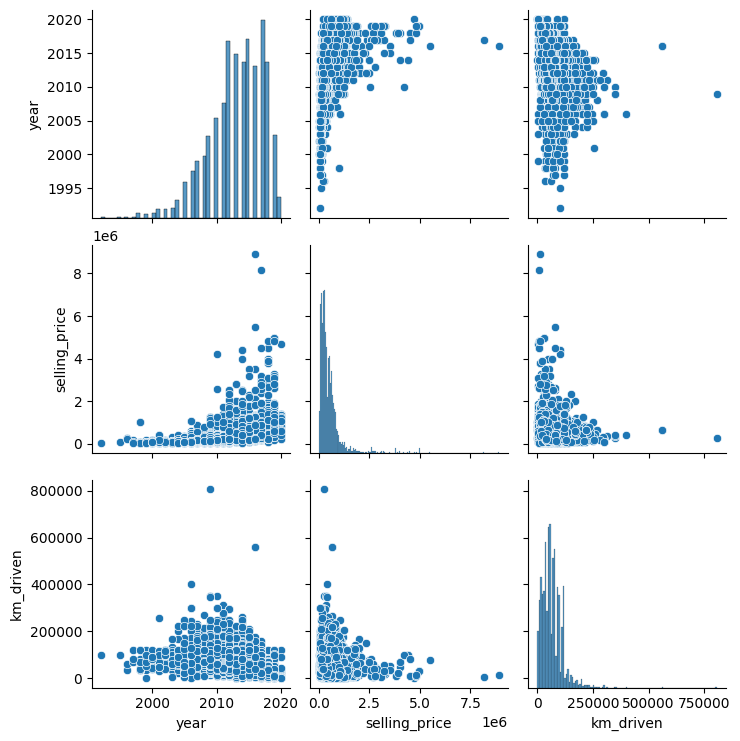

In [7]:
sns.pairplot(df)

<Axes: >

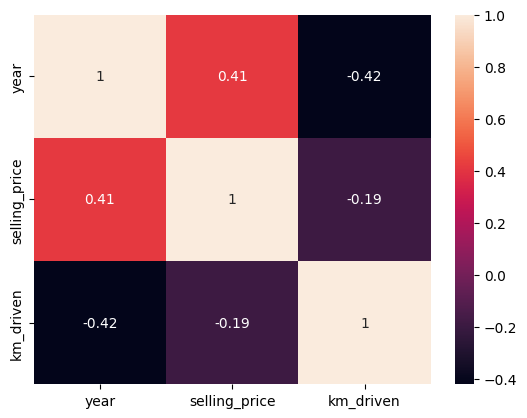

In [8]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

<Axes: xlabel='selling_price'>

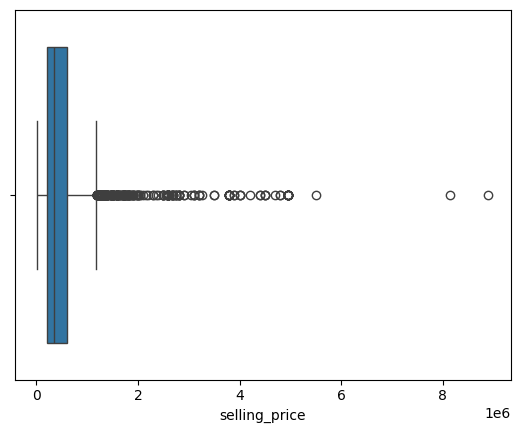

In [9]:
sns.boxplot(x = df['selling_price'])

In [34]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [79]:
df.name.nunique()
df.drop(columns=['seller_type', 'transmission'], inplace=True)
df

,name,year,selling_price,km_driven,fuel,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Second Owner
...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,First Owner


In [173]:
from sklearn.compose import ColumnTransformer
transformer = ColumnTransformer(transformers=[
('tr1', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ['fuel', 'transmission']),
('tr2', OrdinalEncoder(categories=[['Test Drive Car','Fourth & Above Owner','Third Owner','Second Owner','First Owner']]),['owner'] )
], remainder='passthrough'
)


In [174]:
xtrain_trf=transformer.fit_transform(xtrain)
transformer

,transformers,"[('tr1', ...), ('tr2', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,None
,sparse_output,False


In [175]:
xtest_trf=transformer.transform(xtest)

In [176]:
mod.fit(xtrain_trf, ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [177]:
ypred= mod.predict(xtest_trf)

In [178]:
print(r2_score(ytest, ypred))

0.44270152148781927


In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df.drop('name', axis=1, inplace=True)

In [20]:
df.head()
numeric_cols = ["year", "km_driven"]

In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

transformer = ColumnTransformer(
    transformers=[
        ("tr1", OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ["fuel", "seller_type", "transmission", "owner"]),
        ('num', StandardScaler(), numeric_cols)
    ],
    remainder="passthrough"
    
)

In [34]:
xtrain, xtest, ytrain, ytest = train_test_split(df.drop("selling_price", axis=1), df["selling_price"], test_size=0.3, random_state=42)

In [35]:
model = Pipeline(steps=[
    ('transformer', transformer),
    ('lr', LinearRegression())
])
model.fit(xtrain, ytrain)

,steps,"[('transformer', ...), ('lr', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('tr1', ...), ('num', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [38]:
model.named_steps

{'transformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('tr1',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse_output=False),
                                  ['fuel', 'seller_type', 'transmission',
                                   'owner']),
                                 ('num', StandardScaler(),
                                  ['year', 'km_driven'])]),
 'lr': LinearRegression()}

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [36]:
ypred = model.predict(xtest)

In [37]:
print(r2_score(ytest, ypred))

0.4482967510469342


In [32]:
df.corr(numeric_only=True)

,year,selling_price,km_driven
year,1.000000,0.413922,-0.419688
selling_price,0.413922,1.000000,-0.192289
km_driven,-0.419688,-0.192289,1.000000


In [45]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, xtrain, ytrain, cv=10, scoring='r2').mean()

np.float64(0.4596664508139413)

In [46]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))